In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helpers import scatter_plot, random_seed, target_feature

np.random.seed(random_seed)

## 5. Feature Engineering

In [2]:
train_df = pd.read_csv(f'../data/post_impute_train.csv', index_col=0)
test_df = pd.read_csv(f'../data/post_impute_test.csv', index_col=0)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370736 entries, 442244 to 320663
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_NH4                       370736 non-null  float64
 1   R_PHAEO                     370736 non-null  float64
 2   R_SIGMA                     370736 non-null  float64
 3   R_O2                        370736 non-null  float64
 4   R_Depth                     370736 non-null  float64
 5   R_TEMP                      370736 non-null  float64
 6   R_SIO3                      370736 non-null  float64
 7   R_SVA                       370736 non-null  float64
 8   Lon_Dec                     370736 non-null  float64
 9   Lat_Dec                     370736 non-null  float64
 10  R_SALINITY                  370736 non-null  float64
 11  R_PO4                       370736 non-null  float64
 12  R_DYNHT                     370736 non-null  float64
 13  R_CHLA        

## Feature engineering
We apply feature engineering techniques to the selected variables with skewed distributions. We will keep variables with "somewhat" normal distributions intact. Creating categorical variables was done before imputation.

#### R_O2

Let's take a square root.

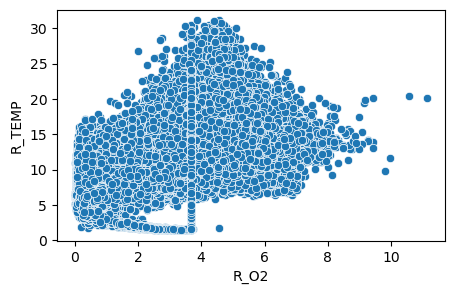

In [4]:
scatter_plot(train_df['R_O2'], train_df[target_feature])

In [5]:
train_df['R_O2_sqrt'] = np.sqrt(train_df['R_O2'])
test_df['R_O2_sqrt'] = np.sqrt(test_df['R_O2'])

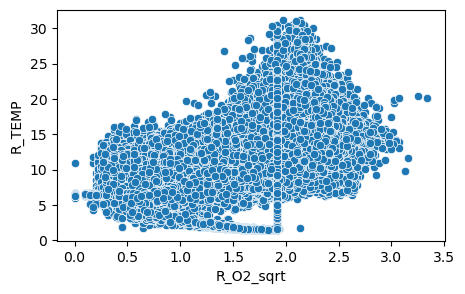

In [6]:
scatter_plot(train_df['R_O2_sqrt'], train_df[target_feature])

#### Lat_Dec, Lon_Dec

Let's transform them into the polar system and add two new features.

In [7]:
def cartesian_to_polar(x, y):
    rho = np.sqrt(x*x + y*y)
    phi = np.arctan2(y, x)

    return (rho, phi)

v_cartesian_to_polar = np.vectorize(cartesian_to_polar)

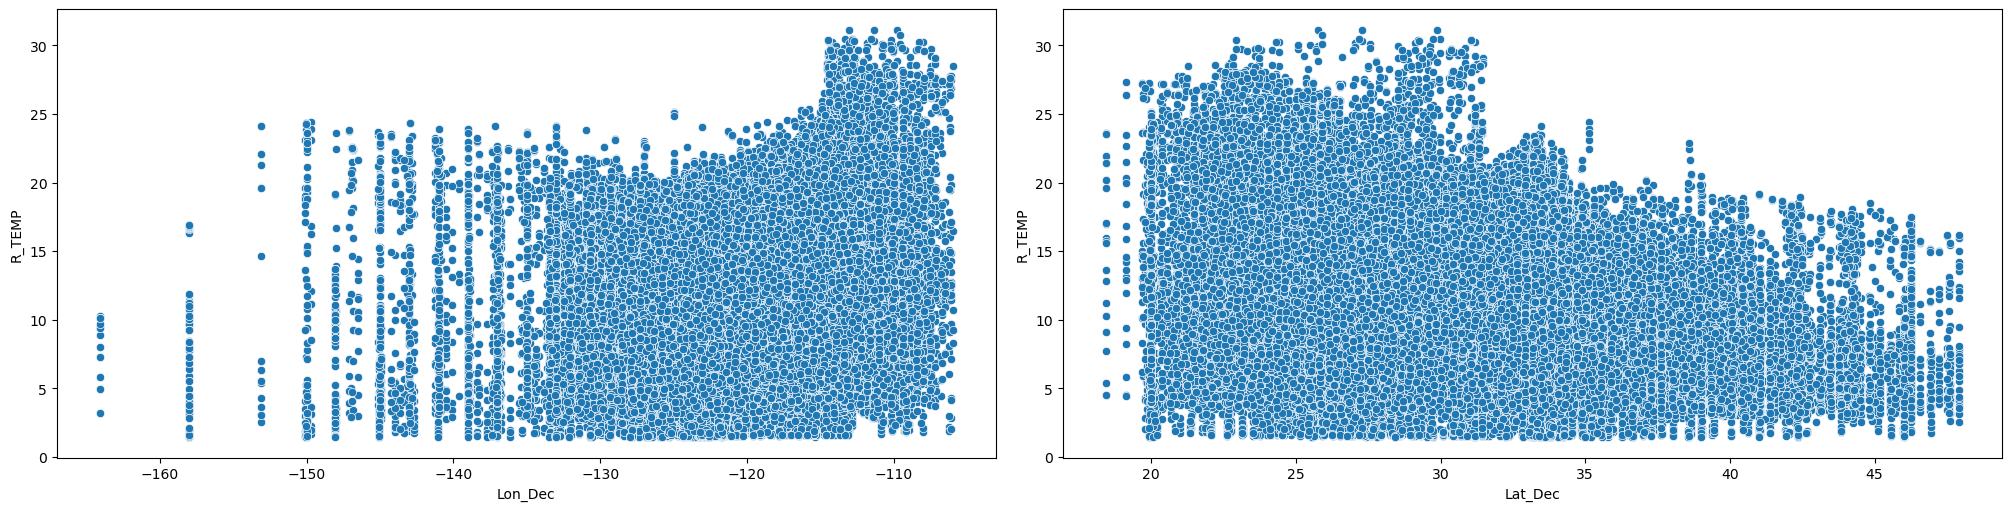

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), layout='constrained')
sns.scatterplot(x=train_df['Lon_Dec'], y=train_df[target_feature], ax=axes[0])
sns.scatterplot(x=train_df['Lat_Dec'], y=train_df[target_feature], ax=axes[1])

plt.show()

In [9]:
train_df['Rho'], train_df['Phi'] = v_cartesian_to_polar(train_df['Lon_Dec'], train_df['Lat_Dec'])
test_df['Rho'], test_df['Phi'] = v_cartesian_to_polar(test_df['Lon_Dec'], test_df['Lat_Dec'])

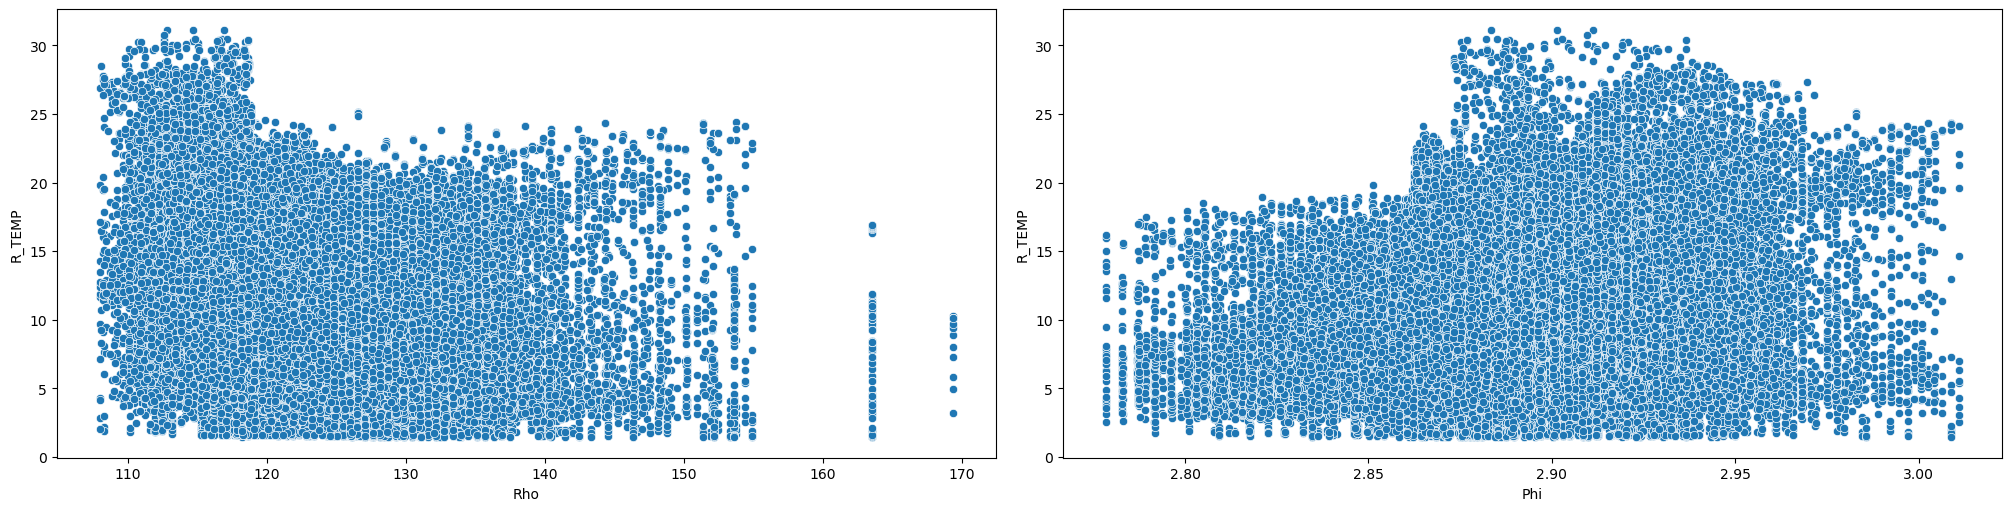

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), layout='constrained')
sns.scatterplot(x=train_df['Rho'], y=train_df[target_feature], ax=axes[0])
sns.scatterplot(x=train_df['Phi'], y=train_df[target_feature], ax=axes[1])

plt.show()

In [11]:
print(train_df.shape, test_df.shape)
print(all(train_df.columns == test_df.columns))
print(train_df.shape[1] == len(set(train_df.columns)))

(370736, 69) (158887, 69)
True
True


## Save the data

In [12]:
train_df.to_csv('../data/post_fe_train.csv')
test_df.to_csv('../data/post_fe_test.csv')